In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Demographics of Affected Population in Morocco

## Assignment

To estimate the potential number of people impacted from the earthquake, the team has turned to private sector data sources. The Data Lab used algorithmically generated data such as that released by [Meta](https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps) and Atlas AI. 

Additionally, the team also extracted the [Relative Wealth Index](https://dataforgood.facebook.com/dfg/tools/relative-wealth-index) data from Meta which helps identify differences in standard of living in the population. 

## Data

### High Resolution Population Density

In partnership with the Center for International Earth Science Information Network (CIESIN) at Columbia University, Meta uses state-of-the-art computer vision techniques to identify buildings from publicly accessible mapping services to create these population datasets. These maps are available at 30-meter resolution. These maps aren’t built using Facebook data and instead rely on applying machine vision AI to satellite imagery and census information. This data is publicly accessible on their [AWS Server](https://registry.opendata.aws/dataforgood-fb-hrsl/) and detailed documentation can be found [here](https://dataforgood.facebook.com/dfg/docs/methodology-high-resolution-population-density-maps). 

The Population Data is demographically disaggregated into the following categories
* Men
* Women
* Children under 5
* Elderly
* Women of Reproductive Age (15-49)
* Youth (15-24)
* Senior

### Relative Wealth Index

The Meta Relative Wealth Index predicts the relative standard of living within countries using privacy protecting connectivity data, satellite imagery, and other novel data sources. To calculate this index, Meta uses measurements of household wealth collected through *face-to-face surveys conducted by the United States Agency for International Development* with 1,457,315 unique households living in 66,819 villages in 56 different LMICs around the world. Following this, they use spatial markers to link villages to non-traditional data sources , including satellite imagery, cellular network data, topographic maps, and *privacy protecting connectivity data from Facebook*. They process the non-traditional data using deep learning and other computational algorithms, which convert the raw data to a set of quantitative features for each village. They use these features to train a supervised machine learning model that predicts the relative wealth of each populated 2.4km2 grid cell on the planet, even in regions where no ground truth data exists (Chi et. al., 2022).

The Relative Wealth Index is a number that compared the wealth within the country where negative RWI implies poorer areas and positive RWI implies richer areas. 

## Methodology and Implementation

The data extracted from Meta was then aggregated to different admin levels using the shapefiles available on [GADM](https://gadm.org/download_country.html). These datasets are made available on [SharePoint](https://worldbankgroup.sharepoint.com.mcas.ms/teams/DevelopmentDataPartnershipCommunity-WBGroup/Shared%20Documents/Forms/AllItems.aspx?csf=1&web=1&e=Yvwh8r&cid=fccdf23e%2D94d5%2D48bf%2Db75d%2D0af291138bde&FolderCTID=0x012000CFAB9FF0F938A64EBB297E7E16BDFCFD&id=%2Fteams%2FDevelopmentDataPartnershipCommunity%2DWBGroup%2FShared%20Documents%2FProjects%2FData%20Lab%2FLebanon%20Economic%20Analytics%2FData%2Fpopulation%2Fmeta%2Dhigh%2Dresolution%2Dpopulation%2Ddensity%2F2023&viewid=80cdadb3%2D8bb3%2D47ae%2D8b18%2Dc1dd89c373c5). 

In [3]:
morocco_adm2 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_2.shp')
morocco_adm1 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_1.shp')
morocco_adm4= gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_4.shp')
morocco_adm3 = gpd.read_file('../../data/shapefiles/gadm41_MAR_shp/gadm41_MAR_3.shp')

In [5]:
#hrsl = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_general_2020_csv/mar_general_2020.csv')
hrsl_children = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_children_under_five_2020_csv/mar_children_under_five_2020.csv')
hrsl_men = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_men_2020_csv/mar_men_2020.csv')
hrsl_women = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_women_2020_csv/mar_women_2020.csv')
hrsl_youth = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_youth_15_24_2020_csv/mar_youth_15_24_2020.csv')
hrsl_elderly = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_elderly_60_plus_2020_csv/mar_elderly_60_plus_2020.csv')
hrsl_women_reproductive = pd.read_csv('../../data/population/hrsl/Morocco/mar_csv/mar_women_of_reproductive_age_15_49_2020_csv/mar_women_of_reproductive_age_15_49_2020.csv')

In [35]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(hrsl_women_reproductive.longitude, hrsl_women_reproductive.latitude)]
hrsl_women_reproductive = gpd.GeoDataFrame(hrsl_women_reproductive, crs="EPSG:4326", geometry=geometry)

In [36]:
hrsl_morocco3 = morocco_adm3.sjoin(hrsl_women_reproductive)
hrsl_morocco4 = morocco_adm4.sjoin(hrsl_women_reproductive)
hrsl_morocco1 = morocco_adm1.sjoin(hrsl_women_reproductive)
hrsl_morocco2 = morocco_adm2.sjoin(hrsl_women_reproductive)

In [38]:
hrsl_morocco3.groupby(['NAME_1', 'NAME_2', 'NAME_3']).sum()[['mar_women_of_reproductive_age_15_49_2020']].reset_index().to_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_women_reproductive_adm3.csv')
hrsl_morocco2.groupby(['NAME_1', 'NAME_2']).sum()[['mar_women_of_reproductive_age_15_49_2020']].reset_index().to_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_women_reproductive_adm2.csv')
hrsl_morocco1.groupby(['NAME_1']).sum()[['mar_women_of_reproductive_age_15_49_2020']].reset_index().to_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_women_reproductive_adm1.csv')
hrsl_morocco4.groupby(['NAME_1', 'NAME_2', 'NAME_3', 'NAME_4']).sum()[['mar_women_of_reproductive_age_15_49_2020']].reset_index().to_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_women_reproductive_adm4.csv')

In [65]:
import glob

hrsl_morocco3 = pd.read_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_adm3.csv')
hrsl_morocco3.drop(columns = 'Unnamed: 0', inplace= True)

all_files = glob.glob('../../data/population/hrsl/morocco_processed/hrsl_morocco_*_adm3.csv')


for file in all_files:
    df = pd.read_csv(file)
    df.drop(columns = 'Unnamed: 0', inplace= True)
    hrsl_morocco3 = hrsl_morocco3.merge(df, on = ['NAME_1', 'NAME_2', 'NAME_3'])

In [66]:
hrsl_morocco4 = pd.read_csv('../../data/population/hrsl/morocco_processed/hrsl_morocco_adm4.csv')
hrsl_morocco4.drop(columns = 'Unnamed: 0', inplace= True)

all_files = glob.glob('../../data/population/hrsl/morocco_processed/hrsl_morocco_*_adm4.csv')


for file in all_files:
    df = pd.read_csv(file)
    df.drop(columns = 'Unnamed: 0', inplace= True)
    hrsl_morocco4 = hrsl_morocco4.merge(df, on = ['NAME_1', 'NAME_2', 'NAME_3', 'NAME_4'])

In [43]:
eq_adm3 = pd.read_csv('../../data/earthquake/earthquake_intensity_adm3_gadm.csv')
eq_adm4 = pd.read_csv('../../data/earthquake/earthquake_intensity_adm4_gadm.csv')

In [44]:
affected_adm1 = ['Souss - Massa - Draâ', 'Marrakech - Tensift - Al Haouz']
affected_adm2 = list(morocco_adm2[morocco_adm2['NAME_1'].isin(affected_adm1)]['NAME_2'])
affected_adm3 = list(morocco_adm3[morocco_adm3['NAME_1'].isin(affected_adm1)]['NAME_3'])
affected_adm4 = list(morocco_adm4[morocco_adm4['NAME_1'].isin(affected_adm1)]['NAME_4'])

In [45]:
hrsl_morocco3 = morocco_adm3.merge(hrsl_morocco3, on = ['NAME_1', 'NAME_2', 'NAME_3'])

## Population demographic in worst affected Admin 3 regions

Text(-0.35, -0.05, "Source: Population estimates from Meta's HRSL aggregated to admin regions from GADM")

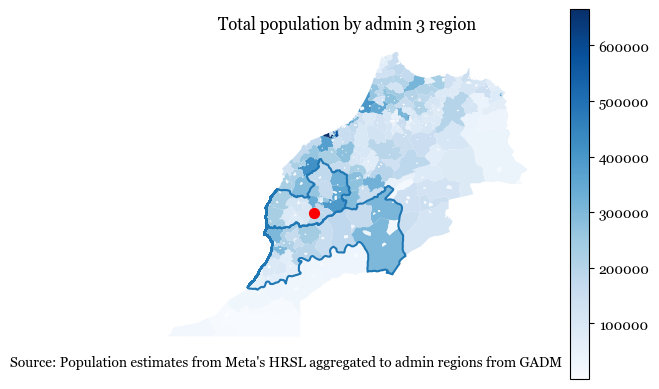

In [46]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Georgia'  # Change 'serif' to your desired font family

fig, ax = plt.subplots()
plt.axis('off')
hrsl_morocco3.plot(column='mar_general_2020', cmap='Blues',legend = True, ax=ax)
morocco_adm1[morocco_adm1['NAME_1'].isin(affected_adm1)].boundary.plot(ax=ax)
plt.title('Total population by admin 3 region', fontsize=12, ha='center')

text_to_add = eq_adm3[eq_adm3['PARAMVALUE']== eq_adm3['PARAMVALUE'].max()]['NAME_3'].iloc[0]
x, y =hrsl_morocco3[hrsl_morocco3['NAME_3']== text_to_add]['geometry'].iloc[0].centroid.x, hrsl_morocco3[hrsl_morocco3['NAME_3']== text_to_add]['geometry'].iloc[0].centroid.y

ax.scatter(x, y, c='red', marker='o', s=50, label=text_to_add)

subtitle_text = "Source: Population estimates from Meta's HRSL aggregated to admin regions from GADM"
ax.text(-0.35, -0.05, subtitle_text, transform=ax.transAxes, fontsize=10, ha='left')

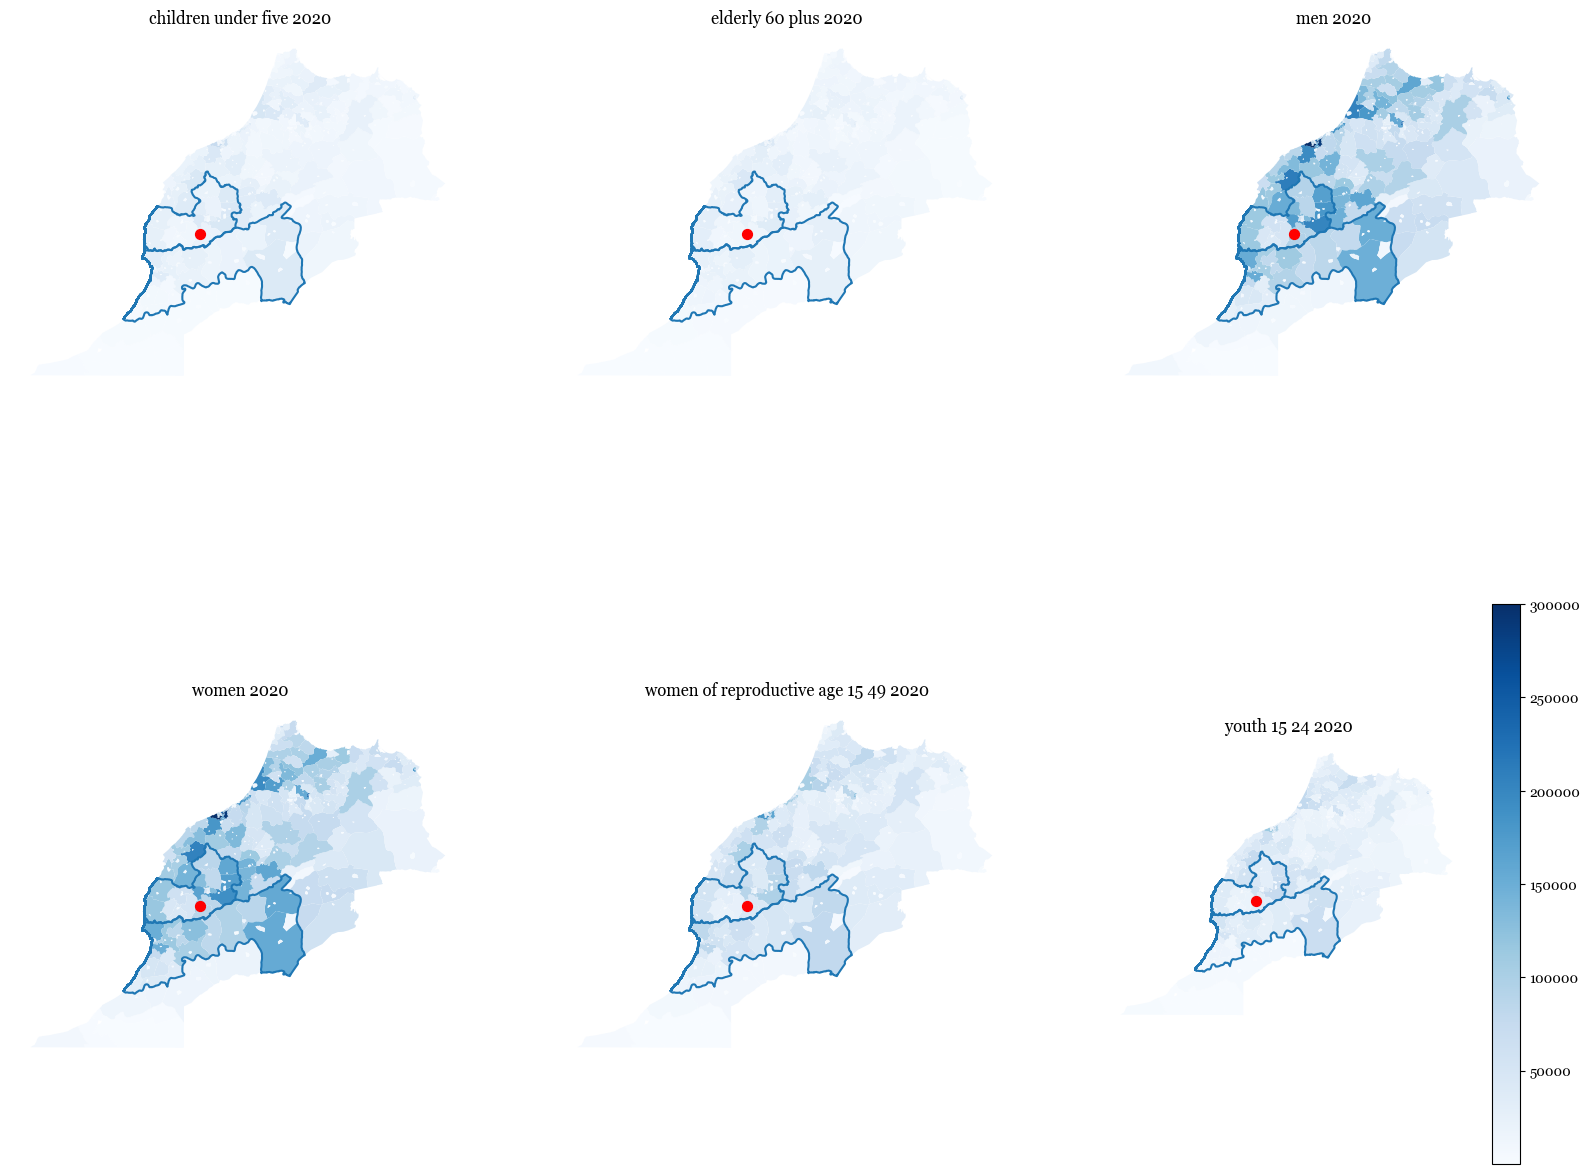

In [58]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Georgia'  # Change 'serif' to your desired font family

fig, axs = plt.subplots(2,3, figsize=(20,16))
ax = axs.flatten()
plt.axis('off')

for id, column in enumerate(['mar_children_under_five_2020', 'mar_elderly_60_plus_2020',
       'mar_men_2020', 'mar_women_2020',
       'mar_women_of_reproductive_age_15_49_2020', 'mar_youth_15_24_2020']):
    if id == 5:
        legend_display = True
    else:
        legend_display = False
    hrsl_morocco3.plot(column=column, cmap='Blues',legend = legend_display, ax=ax[id], vmax = 300000)
    morocco_adm1[morocco_adm1['NAME_1'].isin(affected_adm1)].boundary.plot(ax=ax[id])
    ax[id].set_title(column.replace('_', ' ').replace('mar', '').capitalize(), fontsize=12, ha='center')

    text_to_add = eq_adm3[eq_adm3['PARAMVALUE']== eq_adm3['PARAMVALUE'].max()]['NAME_3'].iloc[0]
    x, y =hrsl_morocco3[hrsl_morocco3['NAME_3']== text_to_add]['geometry'].iloc[0].centroid.x, hrsl_morocco3[hrsl_morocco3['NAME_3']== text_to_add]['geometry'].iloc[0].centroid.y

    ax[id].scatter(x, y, c='red', marker='o', s=50, label=text_to_add)

    ax[id].spines['top'].set_visible(False)
    ax[id].spines['bottom'].set_visible(False)
    ax[id].spines['right'].set_visible(False)
    ax[id].spines['left'].set_visible(False)

    ax[id].set_xticks([])
    ax[id].set_yticks([])

    # subtitle_text = "Source: Population estimates from Meta's HRSL aggregated to admin regions from GADM"
    # ax.text(-0.35, -0.05, subtitle_text, transform=ax.transAxes, fontsize=10, ha='left')

## Population demographic in worst affected Admin 4 regions

In [67]:
hrsl_morocco4.merge(eq_adm4, on =['NAME_1', 'NAME_2', 'NAME_3', 'NAME_4'])[['NAME_1', 'NAME_2', 'NAME_3', 'NAME_4','PARAMVALUE',  'mar_general_2020',
       'mar_children_under_five_2020', 'mar_elderly_60_plus_2020',
       'mar_men_2020', 'mar_women_2020',
       'mar_women_of_reproductive_age_15_49_2020', 'mar_youth_15_24_2020']].sort_values(by='PARAMVALUE', ascending = False).head(5)

,NAME_1,NAME_2,NAME_3,NAME_4,PARAMVALUE,mar_general_2020,mar_children_under_five_2020,mar_elderly_60_plus_2020,mar_men_2020,mar_women_2020,mar_women_of_reproductive_age_15_49_2020,mar_youth_15_24_2020
322,Marrakech - Tensift - Al Haouz,Al Haouz,Asni,Ighil,8.2,14694.404319,1775.225266,1140.076059,7560.906615,7133.497274,3690.867022,2690.012636
313,Marrakech - Tensift - Al Haouz,Al Haouz,Amizmiz,Azgour,8.1,54601.496257,6647.788797,4183.946290,28050.657342,26550.838916,13645.485376,10147.420078
319,Marrakech - Tensift - Al Haouz,Al Haouz,Amizmiz,Tizguine,8.1,12619.880022,1520.609151,985.550420,6702.811717,5917.070392,2984.390484,2497.661054
351,Marrakech - Tensift - Al Haouz,Chichaoua,Majjat,Adassil,8.0,22621.682907,2806.102888,2451.959548,11130.759412,11490.922050,5524.944027,4108.250475
320,Marrakech - Tensift - Al Haouz,Al Haouz,Asni,Aghbar,7.9,82648.977222,9754.119822,6739.932844,42703.697917,39945.275909,20646.463405,15522.905998
